In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

     |████████████████████████████████| 14.5 MB 6.8 kB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 28.0 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 14.0 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 55 kB/s  eta 0:00:01


In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from scipy import optimize
from scipy import stats

In [57]:
CsL0=np.genfromtxt('Caesium A 0.TKA',dtype=float)
CsL10=np.genfromtxt('Caesium A 10.TKA',dtype=float)
CsL20=np.genfromtxt('Caesium A 20.TKA',dtype=float)
CsL30=np.genfromtxt('Caesium A 30.TKA',dtype=float)
CsL40=np.genfromtxt('Caesium A 40.TKA',dtype=float)
CsL50=np.genfromtxt('Caesium A 50.TKA',dtype=float)
Cs0=np.genfromtxt('Caesium L 0.TKA',dtype=float)
Cs10=np.genfromtxt('Caesium L 10.TKA',dtype=float)
Cs20=np.genfromtxt('Caesium L 20.TKA',dtype=float)
Cs30=np.genfromtxt('Caesium L 30.TKA',dtype=float)
Cs40=np.genfromtxt('Caesium L 40.TKA',dtype=float)
Cs50=np.genfromtxt('Caesium L 50.TKA',dtype=float)

CoL0=np.genfromtxt('Cobalt A 0.TKA',dtype=float)
CoL10=np.genfromtxt('Cobalt A 10.TKA',dtype=float)
CoL20=np.genfromtxt('Cobalt A 20.TKA',dtype=float)
CoL30=np.genfromtxt('Cobalt A 30.TKA',dtype=float)
CoL40=np.genfromtxt('Cobalt A 40.TKA',dtype=float)
CoL50=np.genfromtxt('Cobalt A 50.TKA',dtype=float)
Co0=np.genfromtxt('Cobalt L 0.TKA',dtype=float)
Co10=np.genfromtxt('Cobalt L 10.TKA',dtype=float)
Co20=np.genfromtxt('Cobalt L 20.TKA',dtype=float)
Co30=np.genfromtxt('Cobalt L 30.TKA',dtype=float)
Co40=np.genfromtxt('Cobalt L 40.TKA',dtype=float)
Co50=np.genfromtxt('Cobalt L 50.TKA',dtype=float)

# Experiment 352: Gamma ray interaction with matter

## Aim

The purpose of this experiment is to confirm the exponential attenuation law for gamma radiation in solid matter, and to measure the attenuation coefficients of 0.662 and 1.333 MeV gamma rays in aluminium and lead.

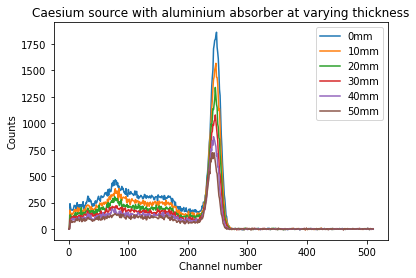

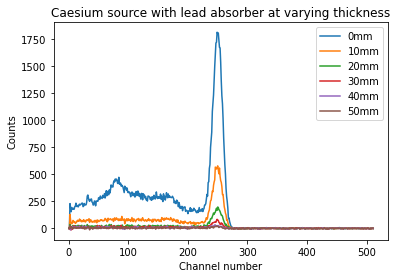

In [58]:
%matplotlib inline

Background1=np.genfromtxt('Background 1.TKA',dtype=float)
Background2=np.genfromtxt('Background 2.TKA',dtype=float)
Chan=np.arange(0,len(Background1),1)
bg=([])
for i in Chan:
    bg=np.append(bg,0.5*(Background1[i]+Background2[i]))
    
    
plt.plot(Chan,(Cs0-bg)) # Imported from 352_DatasetV1, labels swapped for aluminium and lead.
plt.plot(Chan,(Cs10-bg))
plt.plot(Chan,(Cs20-bg))
plt.plot(Chan,(Cs30-bg))
plt.plot(Chan,(Cs40-bg))
plt.plot(Chan,(Cs50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Caesium source with aluminium absorber at varying thickness')
plt.show()


plt.plot(Chan,(CsL0-bg))
plt.plot(Chan,(CsL10-bg))
plt.plot(Chan,(CsL20-bg))
plt.plot(Chan,(CsL30-bg))
plt.plot(Chan,(CsL40-bg))
plt.plot(Chan,(CsL50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Caesium source with lead absorber at varying thickness')
plt.show()

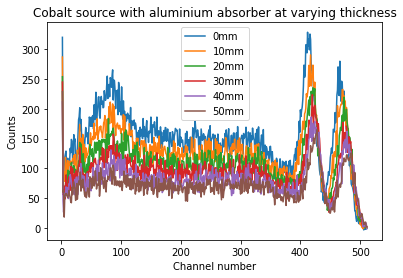

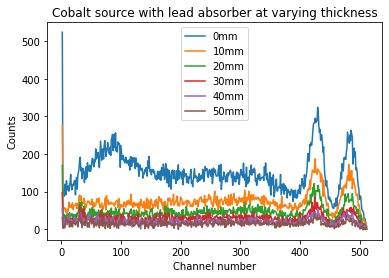

In [56]:
%matplotlib inline

plt.plot(Chan,(Co0-bg))
plt.plot(Chan,(Co10-bg))
plt.plot(Chan,(Co20-bg))
plt.plot(Chan,(Co30-bg))
plt.plot(Chan,(Co40-bg))
plt.plot(Chan,(Co50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Cobalt source with aluminium absorber at varying thickness')
plt.show()


plt.plot(Chan,(CoL0-bg))
plt.plot(Chan,(CoL10-bg))
plt.plot(Chan,(CoL20-bg))
plt.plot(Chan,(CoL30-bg))
plt.plot(Chan,(CoL40-bg))
plt.plot(Chan,(CoL50-bg))
plt.legend(['0mm','10mm','20mm','30mm','40mm','50mm'])
plt.xlabel('Channel number')
plt.ylabel('Counts')
plt.title('Cobalt source with lead absorber at varying thickness')
plt.show()

The Cobalt-60 sample emits Gamma rays at both 1.17 and 1.33 MeV - these are noticeable as the two distinct peaks at channels ~430 and ~480 respectively. Since the aim of the experiment states that we are interested in attenuation of 1.33 MeV gamma rays, further analysis will ignore this first peak and focus only on the attenuation measured by the second peak at 1.33 MeV. Since I was not able to conduct this experiment in person and am relying on uploaded datasets, I do not know the conditions under which the two separate background measurements were taken and therefore chose to simply take the mean of the two, and subtract this mean from the Co and Cs spectra. I believe that, while not perfect, this will give a more accurate picture of the actual spectrum than randomly choosing one of the two individual measurements. In order to calculate attenuation coefficients, I will numerically integrate the area under the peak in each case, and take this as my value of intensity. I can then fit an exponential curve to the graph of intensity vs absorber thickness in each case.

I will do this by scanning the ~40 channel range either side of the peak to determine integral bounds, taking a best estimate from visual comparison of channel energies, and using these bounds for each calculation from the same source, given that the type of absorber will not alter the energy spectrum of the radiation, just the intensity.

In [144]:
PeakChanCs=np.where((Cs0-bg)==np.max(Cs0-bg)) # Finding the channel of the energy peak
print(Cs0[PeakChanCs[0][0]-40:PeakChanCs[0][0]+40]) 
UpperCs=(PeakChanCs[0][0]+22) 
LowerCs=(PeakChanCs[0][0]-22) 
print('Caesium: integration will be over channels:',LowerCs,'to',UpperCs)

IntensityCs0=sp.integrate.trapz(Cs0[LowerCs:UpperCs],x=None)
IntensityCs10=sp.integrate.trapz(Cs10[LowerCs:UpperCs],x=None)
IntensityCs20=sp.integrate.trapz(Cs20[LowerCs:UpperCs],x=None)
IntensityCs30=sp.integrate.trapz(Cs30[LowerCs:UpperCs],x=None)
IntensityCs40=sp.integrate.trapz(Cs40[LowerCs:UpperCs],x=None)
IntensityCs50=sp.integrate.trapz(Cs50[LowerCs:UpperCs],x=None)
IntensityCsL0=sp.integrate.trapz(CsL0[LowerCs:UpperCs],x=None)
IntensityCsL10=sp.integrate.trapz(CsL10[LowerCs:UpperCs],x=None)
IntensityCsL20=sp.integrate.trapz(CsL20[LowerCs:UpperCs],x=None)
IntensityCsL30=sp.integrate.trapz(CsL30[LowerCs:UpperCs],x=None)
IntensityCsL40=sp.integrate.trapz(CsL40[LowerCs:UpperCs],x=None)
IntensityCsL50=sp.integrate.trapz(CsL50[LowerCs:UpperCs],x=None)

print(Co0[440:]) # Just eyeballing channel number since global maximum actually lies in 1st channel so not useful.
LowerCo=444 # Eyeballed from data set, since this was easier than setting up any numerical analysis of the peak.
UpperCo=488

IntensityCo0=sp.integrate.trapz(Co0[LowerCo:UpperCo],x=None)
IntensityCo10=sp.integrate.trapz(Co10[LowerCo:UpperCo],x=None)
IntensityCo20=sp.integrate.trapz(Co20[LowerCo:UpperCo],x=None)
IntensityCo30=sp.integrate.trapz(Co30[LowerCo:UpperCo],x=None)
IntensityCo40=sp.integrate.trapz(Co40[LowerCo:UpperCo],x=None)
IntensityCo50=sp.integrate.trapz(Co50[LowerCo:UpperCo],x=None)
IntensityCoL0=sp.integrate.trapz(CoL0[LowerCo:UpperCo],x=None)
IntensityCoL10=sp.integrate.trapz(CoL10[LowerCo:UpperCo],x=None)
IntensityCoL20=sp.integrate.trapz(CoL20[LowerCo:UpperCo],x=None)
IntensityCoL30=sp.integrate.trapz(CoL30[LowerCo:UpperCo],x=None)
IntensityCoL40=sp.integrate.trapz(CoL40[LowerCo:UpperCo],x=None)
IntensityCoL50=sp.integrate.trapz(CoL50[LowerCo:UpperCo],x=None)

[ 188.  183.  167.  192.  173.  193.  167.  176.  169.  173.  170.  171.
  181.  180.  185.  193.  228.  210.  263.  254.  255.  326.  340.  403.
  499.  545.  629.  723.  833.  888. 1045. 1234. 1358. 1443. 1514. 1713.
 1746. 1795. 1798. 1833. 1866. 1727. 1675. 1619. 1498. 1329. 1272. 1095.
  900.  783.  638.  537.  430.  330.  292.  212.  135.  127.   71.   50.
   39.   34.   18.   14.   13.   16.   10.    8.    7.    4.   13.    5.
    5.    6.   11.    4.    6.    3.    7.    5.]
Caesium: integration will be over channels: 226 to 270
[ 45.  54.  47.  66.  77.  78.  87.  97.  91. 101. 120. 126. 136. 128.
 140. 167. 168. 163. 197. 179. 190. 229. 233. 272. 227. 223. 281. 234.
 216. 247. 244. 210. 219. 232. 182. 207. 186. 167. 168. 165. 152. 119.
 108. 114.  99.  75.  73.  73.  67.  62.  50.  33.  31.  20.  16.  24.
  21.  12.  11.  17.  11.  11.   5.   8.  12.   8.   1.  11.   3.   4.
   2.   3.]


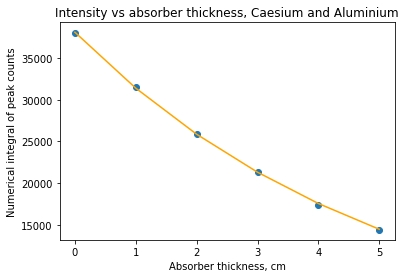

I0: 38084.4098617438
mu: 0.19365565246619412
mu std error (from covariance matrix): 0.0014322746217722288
Normalised Chi-square (Chi Square / (datapoints - fitted parameters)): 1.0213421915560426


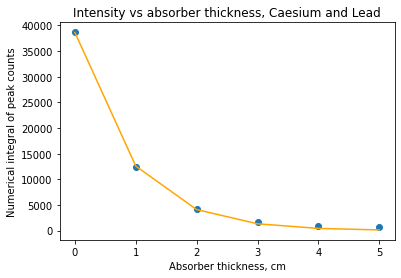

I0: 38622.18479556303
mu: 1.121276780625325
mu std error (from covariance matrix): 0.030092163497134346
Normalised Chi-square (Chi Square / (datapoints - fitted parameters)): 933.1475227244423


In [ ]:
def exp(x,I,u):
    return I * np.e**(-u*x)

Thickness=np.array([0,1,2,3,4,5])
CsAluminiumIntensities=([IntensityCs0,IntensityCs10,IntensityCs20,IntensityCs30,IntensityCs40,IntensityCs50])
plt.scatter(Thickness,[CsAluminiumIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Caesium and Aluminium')
CsParams=sp.optimize.curve_fit(exp,Thickness,CsAluminiumIntensities,p0=[37000,0.2])
plt.plot(Thickness,exp(Thickness,CsParams[0][0],CsParams[0][1]),color='orange')
CsChiSq=sp.stats.chisquare(CsAluminiumIntensities,exp(Thickness,CsParams[0][0],CsParams[0][1]))

plt.show()
print('I0:',CsParams[0][0])
print('mu:',CsParams[0][1])
print('mu std error (from covariance matrix):',CsParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CsChiSq[0]/3)

CsLeadIntensities=([IntensityCsL0,IntensityCsL10,IntensityCsL20,IntensityCsL30,IntensityCsL40,IntensityCsL50])
plt.scatter(Thickness,[CsLeadIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Caesium and Lead')
CsLParams=sp.optimize.curve_fit(exp,Thickness,CsLeadIntensities,p0=[37000,1])
plt.plot(Thickness,exp(Thickness,CsLParams[0][0],CsLParams[0][1]),color='orange')
CsLChiSq=sp.stats.chisquare(CsLeadIntensities,exp(Thickness,CsLParams[0][0],CsLParams[0][1]))
plt.show()
print('I0:',CsLParams[0][0])
print('mu:',CsLParams[0][1])
print('mu std error (from covariance matrix):',CsLParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CsLChiSq[0]/3)


CoAluminiumIntensities=([IntensityCo0,IntensityCo10,IntensityCo20,IntensityCo30,IntensityCo40,IntensityCo50])
plt.scatter(Thickness,[CoAluminiumIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Cobalt and Aluminium')
CoParams=sp.optimize.curve_fit(exp,Thickness,CoAluminiumIntensities,p0=[37000,0.2])
plt.plot(Thickness,exp(Thickness,CoParams[0][0],CoParams[0][1]),color='orange')
CoChiSq=sp.stats.chisquare(CoAluminiumIntensities,exp(Thickness,CoParams[0][0],CoParams[0][1]))
plt.show()
print('I0:',CoParams[0][0])
print('mu:',CoParams[0][1])
print('mu std error (from covariance matrix):',CoParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CoChiSq[0]/3)


CoLeadIntensities=([IntensityCoL0,IntensityCoL10,IntensityCoL20,IntensityCoL30,IntensityCoL40,IntensityCoL50])
plt.scatter(Thickness,[CoLeadIntensities])
plt.xlabel('Absorber thickness, cm')
plt.ylabel('Numerical integral of peak counts')
plt.title('Intensity vs absorber thickness, Cobalt and Lead')
CoLParams=sp.optimize.curve_fit(exp,Thickness,CoLeadIntensities,p0=[37000,0.2])
plt.plot(Thickness,exp(Thickness,CoLParams[0][0],CoLParams[0][1]),color='orange')
CoLChiSq=sp.stats.chisquare(CoLeadIntensities,exp(Thickness,CoLParams[0][0],CoLParams[0][1]))
plt.show()
print('I0:',CoLParams[0][0])
print('mu:',CoLParams[0][1])
print('mu std error (from covariance matrix):',CoLParams[1][1][1]**0.5)
print('Normalised Chi-square (Chi Square / (datapoints - fitted parameters)):',CoLChiSq[0]/3)
